In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [10]:
# Return number of upstream nodes from a target node. 
def query_cost(G, X): #G a DAG, target a node at the base of our query (ie x in p(x|y,z))
    nodes = list(nx.ancestors(G,X))
    print("A query on target", X, "involves", len(nodes), "nodes: ", nodes)
    return(len(nodes))
    
# Do a breadth first upstream search from a target node for reversible edges. 
# Step 1: check (number of parents Pi of target node ==1)
# Step 2: if so, (check number of parents of Pi == 0)
# Step 3: if so, reverse the edge
# Compare number of upstream nodes of original graph to new graph. 
def graph_reduce(G, target): #G a DAG, target a node at the base of our query (ie x in p(x|y,z)) 
    X = target
    cost1 = query_cost(G, X)
    queue = []
    visited = []
    queue.append(X)
    visited.append(X)
    
    while (len(queue) != 0):
        parents = list(G.predecessors(X))
        
        if(len(parents) == 1):  
            parent = parents[0]   
            print("target ", X, "has one parent ", parent)
            grandparents = list(G.predecessors(parent))
            if (len(grandparents) == 0): 
                print(parent, " has no parents, edge (", parent, ",", X, ") is reversible")
                if G.has_edge(parent, X):
                    G.remove_edge(parent, X)
                    G.add_edge(X, parent)
                visited.append(queue[0])
                X = queue[0]
                queue.pop(0)
                
            else:
                for parent_i in list(parents):
                    queue.append(parent_i)
                visited.append(queue[0])
                X = queue[0]
                queue.pop(0)
                            
        else: 
            print("target ", X, " has either more than 1 parent or no parents: ", parents)
            for parent_i in list(parents):
                queue.append(parent_i)
            visited.append(queue[0])
            X = queue[0]
            queue.pop(0)
            
    cost2 = query_cost(G,target)
    print("Upstream nodes reduced by",(cost1-cost2))
    return(G)


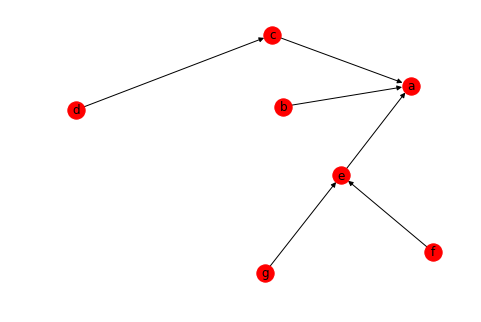

A query on target a involves 6 nodes:  ['g', 'e', 'c', 'd', 'b', 'f']
target  a  has either more than 1 parent or no parents:  ['b', 'c', 'e']
target  a  has either more than 1 parent or no parents:  ['b', 'c', 'e']
target  b  has either more than 1 parent or no parents:  []
target  c has one parent  d
d  has no parents, edge ( d , c ) is reversible
target  e  has either more than 1 parent or no parents:  ['f', 'g']
target  b  has either more than 1 parent or no parents:  []
target  c  has either more than 1 parent or no parents:  []
target  e  has either more than 1 parent or no parents:  ['f', 'g']
target  f  has either more than 1 parent or no parents:  []
target  g  has either more than 1 parent or no parents:  []
target  f  has either more than 1 parent or no parents:  []
A query on target a involves 5 nodes:  ['g', 'e', 'c', 'b', 'f']
Upstream nodes reduced by 1


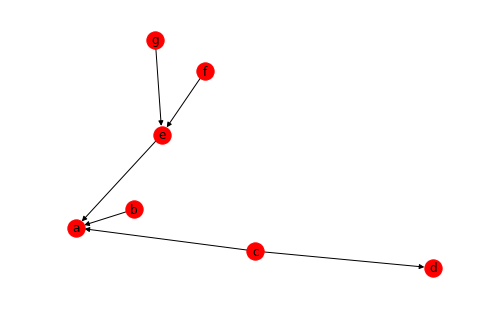

In [11]:
G = nx.DiGraph()
G.add_edges_from([("b","a"),("c","a"),("d","c"),("e","a"),("f","e"),("g","e")])

nx.draw(G, with_labels=True)
plt.show()  

Gred = graph_reduce(G, "a")
nx.draw(Gred, with_labels=True)
plt.show()  


Acyclic: True


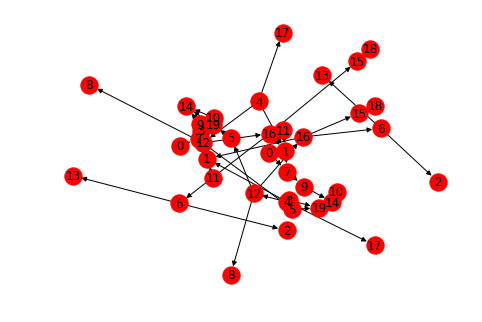

A query on target 5 involves 2 nodes:  [4, 12]
target  5 has one parent  12
target  5 has one parent  12
target  12 has one parent  4
4  has no parents, edge ( 4 , 12 ) is reversible
A query on target 5 involves 1 nodes:  [12]
Upstream nodes reduced by 1


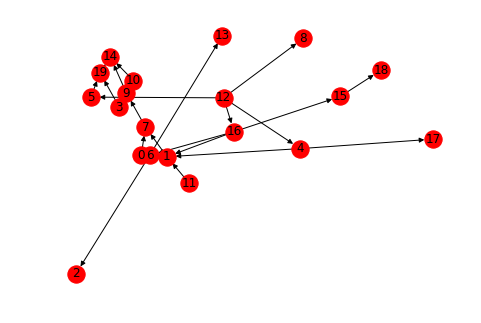

In [12]:
G = nx.erdos_renyi_graph(20, .05, seed=3, directed=True)
acyclic = (nx.is_directed_acyclic_graph(G))
print("Acyclic:", (nx.is_directed_acyclic_graph(G)))

nx.draw(G, with_labels=True)

if acyclic:
    nx.set_edge_attributes(G, "none", 'order')
    nx.set_node_attributes(G, "none", 'order')

    nx.draw(G, with_labels=True)
    plt.show()  

    Gred = graph_reduce(G, 5)
    nx.draw(Gred, with_labels=True)
    plt.show()  

Acyclic: True


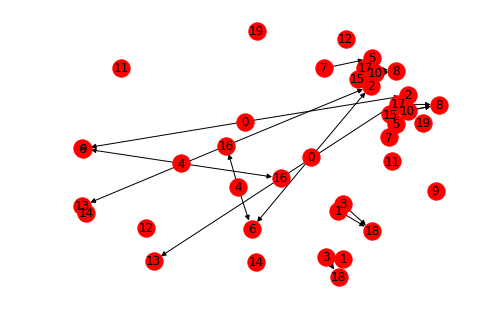

A query on target 17 involves 7 nodes:  [0, 2, 4, 5, 7, 10, 16]
target  17 has one parent  10
target  17 has one parent  10
target  10  has either more than 1 parent or no parents:  [2, 5]
target  10  has either more than 1 parent or no parents:  [2, 5]
target  2  has either more than 1 parent or no parents:  [0, 16]
target  5 has one parent  7
7  has no parents, edge ( 7 , 5 ) is reversible
target  2  has either more than 1 parent or no parents:  [0, 16]
target  5  has either more than 1 parent or no parents:  []
target  0  has either more than 1 parent or no parents:  []
target  16 has one parent  4
4  has no parents, edge ( 4 , 16 ) is reversible
target  0  has either more than 1 parent or no parents:  []
A query on target 17 involves 5 nodes:  [0, 2, 5, 10, 16]
Upstream nodes reduced by 2


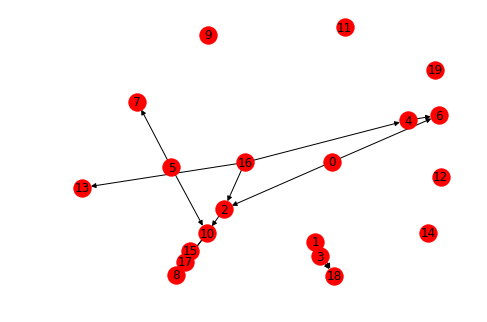

In [45]:
G = nx.erdos_renyi_graph(20, .05, seed=15, directed=True) 
# (seed, target) pairs which are acyclic and interesting: 
#      (3,5)
#      (8,8)
#      (9,17)
#      (15,17)

acyclic = (nx.is_directed_acyclic_graph(G))
print("Acyclic:", (nx.is_directed_acyclic_graph(G)))

nx.draw(G, with_labels=True)

if acyclic:
    nx.set_edge_attributes(G, "none", 'order')
    nx.set_node_attributes(G, "none", 'order')

    nx.draw(G, with_labels=True)
    plt.show()  

    Gred = graph_reduce(G, 17)
    nx.draw(Gred, with_labels=True)
    plt.show()  